# KNN algorithm 

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 


# STEP1 - Import libraries,read the dataset,check for null values

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.shape

(149, 5)

In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [14]:
df['label'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: label, dtype: int64

# Step2 - (choosing location of 'x' and 'y' based on indexing for selection by position) 

In [11]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(149, 4)
(149,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Step3 - using the train_test_split function & plotting a graph(mattplotlib,seaborn)

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 4)
(38, 4)
(111,)
(38,)


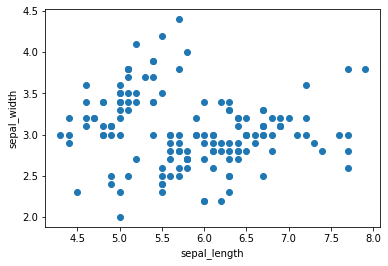

In [22]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

C:\Users\fozan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


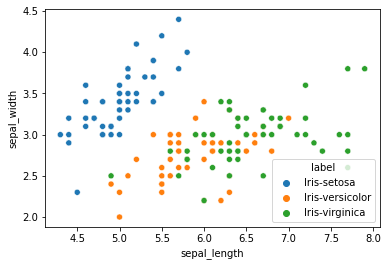

In [25]:
sns.scatterplot(df['sepal_length'],df['sepal_width'],hue =df['label'])
plt.show()


# Step4 - 
 
 1) Define my model using KNeighborsClassifier<br>
 2) Fit my training data into my model - m1.fit()<br>
 3) Test my trained data and making predictions - ypred=m1.predict()<br>
 4) Checking the accuracy - .score()<br>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
m1 = KNeighborsClassifier(n_neighbors = 11)  #K=11
m1.fit(x_train,y_train) #Fit my training data into the model

KNeighborsClassifier(n_neighbors=11)

In [39]:
ypred = m1.predict(x_test) #Testing my trained data and making prediction
print(ypred)
df.head()

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [31]:
#Checking Accuraccy
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))


Training score 0.9819819819819819
Testing score 0.8947368421052632


# Step5 - Generating confusion_matrix and classification_report

confusion_matrix : Confusion Matrix is the visual representation of the Actual VS Predicted values. It measures the performance of our Machine Learning classification model 

classification_report : A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[10  0  0]
 [ 0 13  2]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.87      0.87      0.87        15
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.89      0.89      0.89        38

